# Cho dữ liệu spam.csv chứa thông tin là nội dung các email. 
## Bộ dữ liệu này có thể được sử dụng để dự đoán một email gửi đến là ham hay spam. (link: https://www.kaggle.com/uciml/sms-spam-collection-dataset)

# Yêu cầu:
## Đọc dữ liệu, tìm hiểu sơ bộ về dữ liệu
## Chọn phương pháp để chuẩn hóa dữ liệu và thực hiện việc chuẩn hóa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [4]:
spam = pd.read_csv('data5/Ex3_Spam_vs_Ham/spam.csv', encoding='latin-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Spam = emails that are not desired
## Ham = emails that are desired

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
spam['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

## Output Y: "v1" column, to identify the mail is spam or ham
## Input X: "v2" column, the text contents of the email

In [12]:
y = pd.get_dummies(spam[['v1']]).drop('v1_spam', axis=1).astype(int)
y

,v1_ham
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [14]:
x = spam['v2'].str.replace('([^a-zA-Z])',' ', regex=True).str.lower() #Replace all non-alphabet characters with space character, then lower
x = x.str.replace('(\s+)', ' ', regex=True).str.strip() #Replace multiple consecutive space characters with only one space character
                                                        #.strip() to remove the last space character
x

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object

# Use CountVectorizer to treat the text input X

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()
x_transformed = cv.fit_transform(x).toarray()
x_transformed.shape

(5572, 7682)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2)

# <span style='color:red'>Use Naive Bayes model to predict spam/ham

In [24]:
from sklearn.naive_bayes import MultinomialNB

'''
Multinomial Naive Bayes is specifically designed for classification problems where the features are discrete counts 
(e.g., the number of times a word appears in a document).

It is widely used in text classification tasks, where each feature represents the frequency of a particular word in a document.
'''

clf = MultinomialNB()
model = clf.fit(x_train, y_train)

y_pred_test = model.predict(x_test)

In [26]:
print('Model score in train set =', model.score(x_train, y_train))
print('Model score in test set =', model.score(x_test, y_test))

Model score in train set = 0.9916984518734575
Model score in test set = 0.9847533632286996


In [28]:
from sklearn.metrics import accuracy_score

print("Model accuracy =", accuracy_score(y_test, y_pred_test))

Model accuracy = 0.9847533632286996


In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test, labels=[0,1])

array([[128,   4],
       [ 13, 970]])

## Model validation

In [33]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       132
           1       1.00      0.99      0.99       983

    accuracy                           0.98      1115
   macro avg       0.95      0.98      0.96      1115
weighted avg       0.99      0.98      0.98      1115



## Comments: model has high precision and high recall

In [38]:
y_prob_test = model.predict_proba(x_test)
y_prob_test

array([[2.27984407e-04, 9.99772016e-01],
       [2.74740037e-07, 9.99999725e-01],
       [5.31720056e-06, 9.99994683e-01],
       ...,
       [3.52987897e-07, 9.99999647e-01],
       [9.44414081e-06, 9.99990556e-01],
       [7.53385121e-06, 9.99992466e-01]])

In [40]:
roc_auc_score(y_test, y_prob_test[:,1])

0.9910061962452604

## Visualize AUC ROC

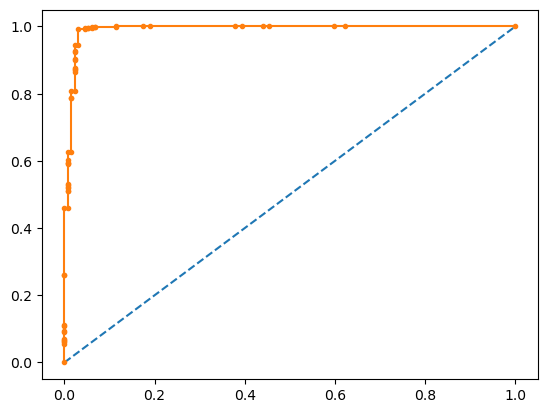

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test[:,1])

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Comments: ROC is high => based on all validations, this model is suitable

# <span style='color:red'>Save model into a file for reuse

In [58]:
#Save model
import pickle
pkl_filename = "ex3_ham_spam_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [61]:
#Call model for reuse
import pickle
with open(pkl_filename, 'rb') as file:
    ham_spam_model = pickle.load(file)

In [73]:
#Create a x_new input
x_new = np.array([
    'Dear Ms. Phuong, I will come on time.',
    'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%'
])

x_new = cv.transform(x_new)

In [75]:
y_pred_new = ham_spam_model.predict(x_new)
y_pred_new

array([1, 0])

## Results:
## 1 = ham = needed mail
## 2 = spam = junk mail
## 'Dear Ms. Phuong, I will come on time.' => 1 => needed mail => TRUE
## '.....Today is the last day of sale. Discount up to 50%' => 0 => junk mail => TRUE